In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
train_d = '/content/drive/MyDrive/Brain/Train'
test_d = '/content/drive/MyDrive/Brain/Test'

In [19]:
batch_size = 64
img_height = 224
img_size=224

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size)

Found 2720 files belonging to 2 classes.
Using 1904 files for training.


In [36]:
test_ds= tf.keras.utils.image_dataset_from_directory(
  test_d,
  seed=123,
  image_size=(img_size,img_size),
  batch_size=64)

Found 488 files belonging to 2 classes.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_d,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_size,img_size),
  batch_size=batch_size)

Found 2720 files belonging to 2 classes.
Using 816 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


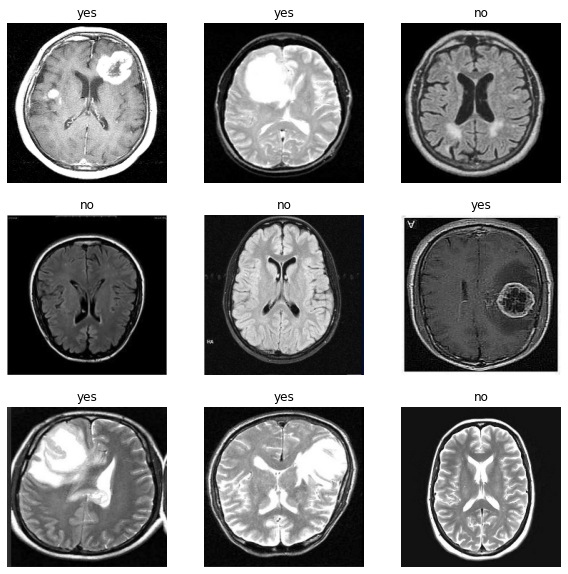

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

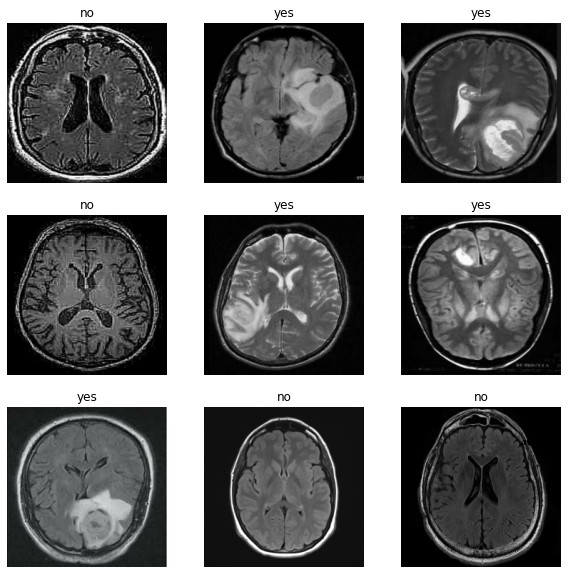

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet")

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.vgg16.preprocess_input(
    inputs, data_format=None)

x = vgg16(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4096, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                           

In [27]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=5e-5)
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy (from_logits=False), metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
cb = ModelCheckpoint("Vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)




In [28]:
history = model.fit(train_ds,epochs=10, validation_data=val_ds, callbacks = cb)

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.7605
Epoch 1: val_accuracy improved from -inf to 0.93505, saving model to Vgg16_1.h5
30/30 [==============================] - 35s 1s/step - loss: 0.4894 - accuracy: 0.7605 - val_loss: 0.1571 - val_accuracy: 0.9350
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9627
Epoch 2: val_accuracy improved from 0.93505 to 0.97549, saving model to Vgg16_1.h5
30/30 [==============================] - 34s 1s/step - loss: 0.0992 - accuracy: 0.9627 - val_loss: 0.0791 - val_accuracy: 0.9755
Epoch 3/10
30/30 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9905
Epoch 3: val_accuracy improved from 0.97549 to 0.98529, saving model to Vgg16_1.h5
30/30 [==============================] - 34s 1s/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0525 - val_accuracy: 0.9853
Epoch 4/10
30/30 [==============================] - ETA: 0s - loss: 0.0193 - accuracy

In [29]:
import numpy as np
import tensorflow as tf

predictions = np.array([])
labels =  np.array([])
i=0;
for x, y in test_ds:
    i+=1
    z=model.predict(x)
    xx = np.round(z)
    prediction=np.concatenate([predictions,xx[:,-1]])
    labels = np.concatenate([labels, y.numpy()])



In [37]:
evaluation = model.evaluate(test_ds, return_dict=True)

8/8 [==============================] - 7s 743ms/step - loss: 0.1065 - accuracy: 0.9795


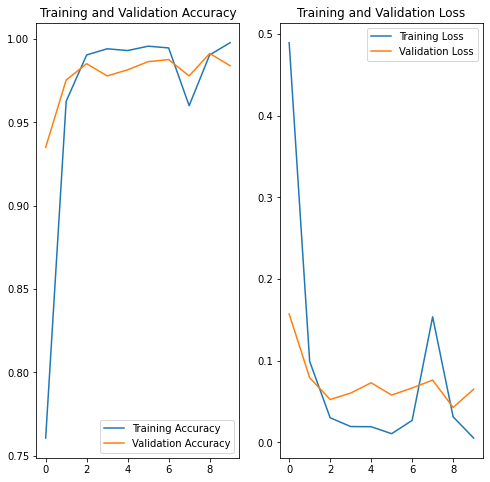

In [31]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
labels

In [ ]:
prediction

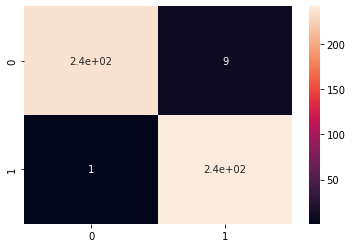

In [34]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,prediction)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [35]:
import sklearn
print(sklearn.metrics.classification_report(prediction,labels))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       237
         1.0       1.00      0.96      0.98       251

    accuracy                           0.98       488
   macro avg       0.98      0.98      0.98       488
weighted avg       0.98      0.98      0.98       488

